In [22]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [80]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
# load the data first
raw_data = pd.read_csv("/Users/weilu/Research/data/training_data/training_set.csv")

In [7]:
raw_test_data = pd.read_csv("/Users/weilu/Research/data/test_data/test_data.csv")

In [90]:
raw_test_data.groupby("Name").describe().stack()

,Step,Qw,Rw,VTotal,QGO,Burial,Water,Rama,Chain,Chi,DSSP,P_AP,Helix,Frag_Mem,Name
0,1,0.642206,-25357.541220,-1041.039794,11.431633,-122.857483,-67.858201,-647.698337,168.209829,34.302323,-0.000000,-6.143964,-53.760710,-356.664884,1MBA
1,2,0.592049,-23982.747463,-892.903884,17.434915,-124.679973,-48.483913,-629.313620,187.855837,56.408218,-0.000542,-3.972628,-48.821527,-299.330651,1MBA
2,3,0.646271,-24229.837390,-935.248471,14.043660,-125.714258,-49.021336,-620.676503,179.710908,39.973846,-0.000959,-3.960233,-47.547005,-322.056590,1MBA
3,4,0.667102,-24093.207322,-922.127259,15.770030,-126.519994,-45.511713,-629.844627,168.412484,42.580307,-0.000747,-4.099364,-43.934473,-298.979160,1MBA
4,5,0.697657,-24526.447174,-896.456937,15.329368,-125.012346,-50.401883,-622.295216,190.424375,43.516979,-0.003721,-4.771043,-46.453310,-296.790139,1MBA
5,6,0.661085,-24545.307471,-912.176207,17.765244,-126.028231,-45.715756,-632.824581,191.995985,52.392239,-0.000478,-5.017589,-42.258788,-322.484251,1MBA
6,7,0.680621,-24800.514112,-932.935837,16.294323,-124.390942,-51.328426,-637.752450,193.668463,41.910365,-0.000206,-4.998277,-51.413289,-314.925398,1MBA
7,8,0.696199,-24400.842171,-935.657349,18.676804,-123.564156,-45.588914,-636.146380,177.531075,36.142383,-0.000866,-4.465104,-39.649466,-318.592725,1MBA
8,9,0.663718,-24327.115316,-870.940819,20.282472,-125.657467,-47.968761,-607.062704,193.970523,39.476324,-0.001125,-4.491294,-36.869053,-302.619734,1MBA
9,10,0.671354,-24980.173530,-926.204416,18.292951,-125.698964,-49.284430,-610.906347,172.990613,37.183339,-0.004072,-5.126619,-42.819927,-320.830960,1MBA


In [13]:
FEATURES = ["Rw", "VTotal", "QGO"]
LABEL = ["Good"]

In [16]:
def normalize(x):
    return (x - x.mean()) / x.std()

In [19]:
X_train = raw_data[FEATURES].transform(normalize)

In [93]:
X_test = raw_test_data[FEATURES+["Name"]].groupby("Name").transform(normalize)

In [98]:
Y_test = pd.Series(raw_test_data["Qw"] > 0.7)

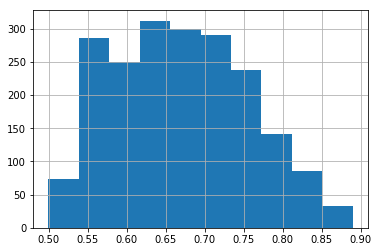

In [27]:
raw_data["Qw"].hist()

In [51]:
Y = pd.Series(raw_data["Qw"] > 0.7)

In [52]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, y, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], y.iloc[train_indices], data.iloc[test_indices], y.iloc[test_indices]

In [53]:
train_set, train_y, test_set, test_y = split_train_test(X_train, Y, 0.2)

In [59]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set.values, train_y.values)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_set.values, train_y.values, cv=3, scoring="accuracy")

array([ 0.83768657,  0.74067164,  0.76865672])

In [62]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, train_set.values, train_y.values, cv=3)

In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y.values, y_train_pred)

array([[802, 194],
       [156, 456]])

In [99]:
y_scores = cross_val_predict(sgd_clf, X_test.values, Y_test.values, cv=3,
                             method="decision_function")

In [100]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_test.values, y_scores)

Saving figure precision_recall_vs_threshold_plot


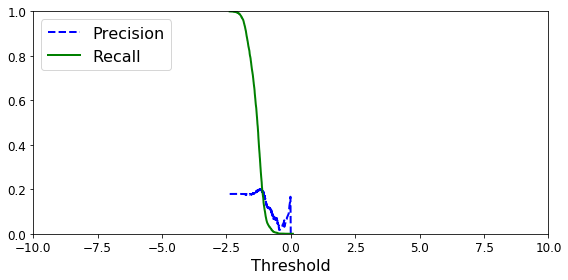

In [103]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [65]:
y_scores = cross_val_predict(sgd_clf, train_set.values, train_y.values, cv=3,
                             method="decision_function")

In [67]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_y.values, y_scores)

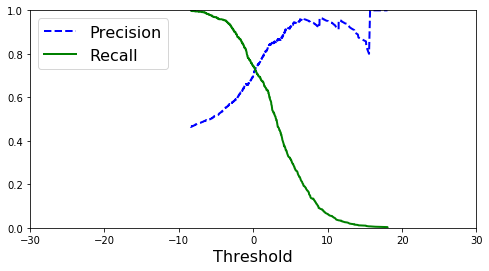

In [73]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-30, 30])
plt.show()

In [74]:
y_train_pred_90 = (y_scores > 6)

In [76]:
from sklearn.metrics import precision_score, recall_score
precision_score(train_y.values, y_train_pred_90)

0.94968553459119498

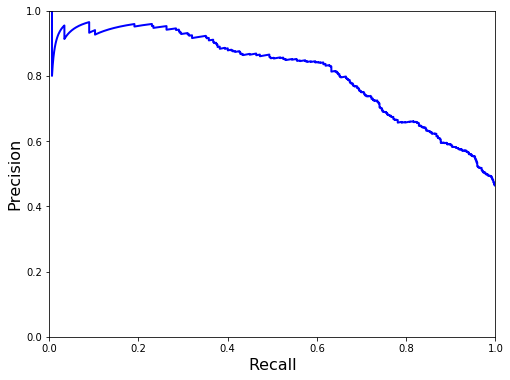

In [77]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [78]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_y.values, y_scores)

Saving figure roc_curve_plot


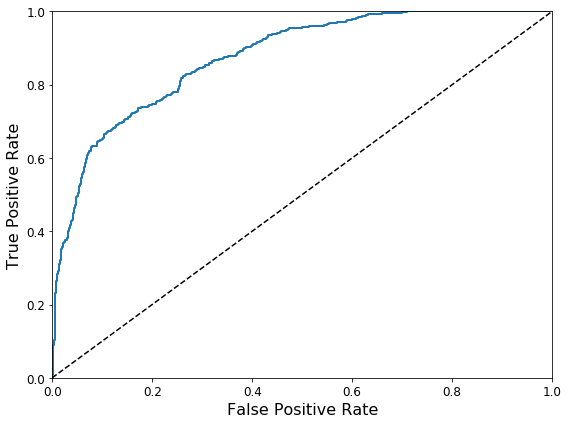

In [81]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_y.values, y_scores)

0.87445697823975643

Saving figure roc_curve_comparison_plot


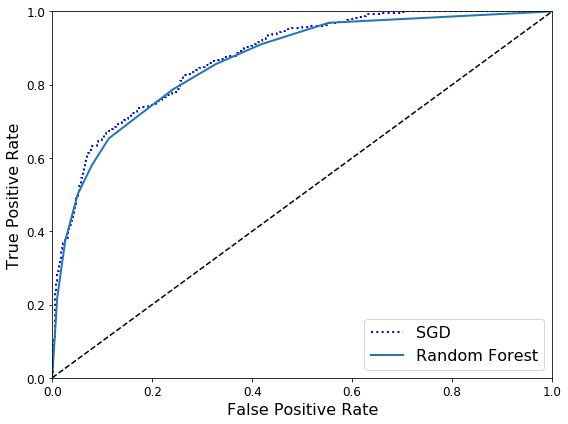

In [108]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, class_weight={0:.1, 1:.9})
y_probas_forest = cross_val_predict(forest_clf, train_set.values, train_y.values, cv=3,
                                    method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_y.values,y_scores_forest)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_set.values, train_y.values, cv=3,
                                    method="predict_proba")

In [84]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_y.values,y_scores_forest)

Saving figure roc_curve_comparison_plot


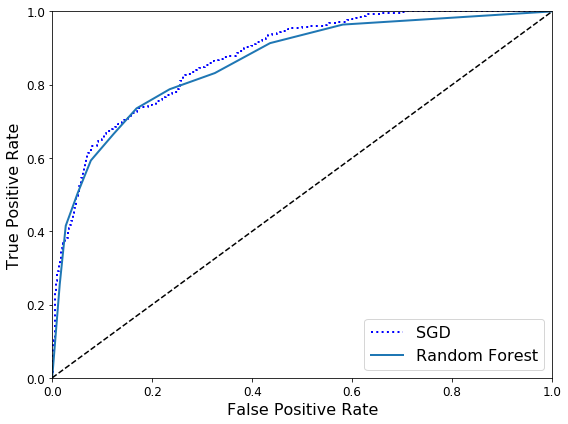

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [86]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(train_set.values, train_y.values)
for name, score in zip(["Rw", "VTotal", "QGO"], rnd_clf.feature_importances_):
    print(name, score)

Rw 0.299058961859
VTotal 0.269804844783
QGO 0.431136193357
